In [193]:
# Import packages needed
import pandas as pd
import re
import numpy as np
import nltk
import string
import os
import seaborn as sns
from itertools import accumulate
from operator import add 
from os import path
from nltk.stem.porter import PorterStemmer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Read in the Bibles as XML
# read in the tsv file as docs
#all_text=pd.read_csv("KJV.txt", delimiter='\t')


In [2]:
import xml.etree.ElementTree as ET

In [3]:
tree = ET.parse('KJV.xml')
root = tree.getroot()

In [4]:
kjv_proverbs = root.find("./BIBLEBOOK[@bname='Proverbs']")
#root.getchildren()[20].getchildren()
#list(kjv_proverbs.getchildren()[0].iter())

In [5]:
number = list(kjv_proverbs.getchildren()[0].iter())
num = [item for item in number]
num

C:\Users\Maximilliano\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  """Entry point for launching an IPython kernel.


[<Element 'CHAPTER' at 0x000001CCA6D13048>,
 <Element 'VERS' at 0x000001CCA6D13098>,
 <Element 'VERS' at 0x000001CCA6D130E8>,
 <Element 'VERS' at 0x000001CCA6D13138>,
 <Element 'VERS' at 0x000001CCA6D13188>,
 <Element 'VERS' at 0x000001CCA6D131D8>,
 <Element 'VERS' at 0x000001CCA6D13228>,
 <Element 'VERS' at 0x000001CCA6D13278>,
 <Element 'VERS' at 0x000001CCA6D132C8>,
 <Element 'VERS' at 0x000001CCA6D13318>,
 <Element 'VERS' at 0x000001CCA6D13368>,
 <Element 'VERS' at 0x000001CCA6D133B8>,
 <Element 'VERS' at 0x000001CCA6D13408>,
 <Element 'VERS' at 0x000001CCA6D13458>,
 <Element 'VERS' at 0x000001CCA6D134A8>,
 <Element 'VERS' at 0x000001CCA6D134F8>,
 <Element 'VERS' at 0x000001CCA6D13548>,
 <Element 'VERS' at 0x000001CCA6D13598>,
 <Element 'VERS' at 0x000001CCA6D135E8>,
 <Element 'VERS' at 0x000001CCA6D13638>,
 <Element 'VERS' at 0x000001CCA6D13688>,
 <Element 'VERS' at 0x000001CCA6D136D8>,
 <Element 'VERS' at 0x000001CCA6D13728>,
 <Element 'VERS' at 0x000001CCA6D13778>,
 <Element 'VE

In [ ]:
list(root.getchildren()[20].getchildren())

In [12]:
chapter = [child.attrib for child in kjv_proverbs]
chapter_num = [info.attrib for child in kjv_proverbs for info in child]
#chapter_num = [dictionary for dictionary in chapter_num]

chapter_text = [info.text for child in kjv_proverbs for info in child]
chapter_num



chapter_numbers = []
for item in chapter_num:
    for k,v in item.items():
        if k.startswith('vnumber'):
            chapter_numbers.append(v)

kjv_prov = pd.DataFrame({'Verse': chapter_numbers, 'KJV': chapter_text})

kjv_prov.Verse = pd.to_numeric(kjv_prov.Verse, errors='coerce').astype(np.int64)

chapter = list(accumulate((int(x == 1) for x in kjv_prov['Verse']), add))

kjv_prov = pd.DataFrame({'Chapter':chapter,'Verse': chapter_numbers, 'KJV': chapter_text})
# [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]
kjv_prov
#kjv_prov.head(50)     

,Chapter,Verse,KJV
0,1,1,"The proverbs of Solomon the son of David, king..."
1,1,2,To know wisdom and instruction; to perceive th...
2,1,3,"To receive the instruction of wisdom, justice,..."
3,1,4,"To give subtilty to the simple, to the young m..."
4,1,5,"A wise man will hear, and will increase learni..."
5,1,6,"To understand a proverb, and the interpretatio..."
6,1,7,The fear of the Lord is the beginning of knowl...
7,1,8,"My son, hear the instruction of thy father, an..."
8,1,9,For they shall be an ornament of grace unto th...
9,1,10,"My son, if sinners entice thee, consent thou not."


In [ ]:
### VADER Sentiment Per Verse

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [27]:
vader_scores = [analyzer.polarity_scores(text) for text in kjv_prov['KJV']]
vader_scores[0:5]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.5267},
 {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.7783},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'compound': 0.8176}]

In [28]:
for sentence, score_dict in zip(kjv_prov['KJV'], vader_scores):
    score_dict['text'] = sentence

In [ ]:
score_dict

In [29]:
vader_df = pd.DataFrame(vader_scores)[['compound', 'neg', 'neu', 'pos']]
#vader_df = vader_df.sort_values('compound', ascending=False)
vader_df.head(2)

,compound,neg,neu,pos
0,0.0000,0.0,1.000,0.000
1,0.5267,0.0,0.746,0.254


In [30]:
#add vader scores to all_text df
kjv_prov = pd.concat([kjv_prov,vader_df], axis=1)
#master_df[['neg','neu','pos']].describe()


In [31]:
kjv_prov.head()

,Chapter,Verse,KJV,compound,neg,neu,pos
0,1,1,"The proverbs of Solomon the son of David, king...",0.0000,0.0,1.000,0.000
1,1,2,To know wisdom and instruction; to perceive th...,0.5267,0.0,0.746,0.254
2,1,3,"To receive the instruction of wisdom, justice,...",0.7783,0.0,0.570,0.430
3,1,4,"To give subtilty to the simple, to the young m...",0.0000,0.0,1.000,0.000
4,1,5,"A wise man will hear, and will increase learni...",0.8176,0.0,0.622,0.378


In [34]:
val = [num for num in kjv_prov['compound']]


In [40]:
#The Sentiment score is based on VADER analysis of the Verse Text
#The assumption is made, if the compound score is a positive number, then the verse is more positive(2) than negative.
#The assumption is made, if the compound score is a negative number, then the verse is more negative(0) than positive.
#The assumption is made, if the compound score is == 0, the the verse is neutral(1)
#The values are:
#Positive = 2
#Neutral = 1
#Negative = 0

sentiment = []
for num in kjv_prov['compound']:
    if num > 0:
        sentiment.append(2)
    elif num == 0:
        sentiment.append(1)
    elif num < 0:
        sentiment.append(0)

kjv_prov['Sentiment'] = sentiment
    

In [48]:
kjv_prov.head(30)

,Chapter,Verse,KJV,compound,neg,neu,pos,Sentiment
0,1,1,"The proverbs of Solomon the son of David, king...",0.0000,0.000,1.000,0.000,1
1,1,2,To know wisdom and instruction; to perceive th...,0.5267,0.000,0.746,0.254,2
2,1,3,"To receive the instruction of wisdom, justice,...",0.7783,0.000,0.570,0.430,2
3,1,4,"To give subtilty to the simple, to the young m...",0.0000,0.000,1.000,0.000,1
4,1,5,"A wise man will hear, and will increase learni...",0.8176,0.000,0.622,0.378,2
5,1,6,"To understand a proverb, and the interpretatio...",0.4767,0.000,0.819,0.181,2
6,1,7,The fear of the Lord is the beginning of knowl...,-0.5994,0.364,0.460,0.176,0
7,1,8,"My son, hear the instruction of thy father, an...",0.0000,0.000,1.000,0.000,1
8,1,9,For they shall be an ornament of grace unto th...,0.4215,0.000,0.843,0.157,2
9,1,10,"My son, if sinners entice thee, consent thou not.",0.2263,0.000,0.808,0.192,2


In [337]:
kjv_df = pd.DataFrame(kjv_prov[['Chapter', 'Verse','KJV','Sentiment']])
kjv_df

,Chapter,Verse,KJV,Sentiment
0,1,1,"The proverbs of Solomon the son of David, king...",1
1,1,2,To know wisdom and instruction; to perceive th...,2
2,1,3,"To receive the instruction of wisdom, justice,...",2
3,1,4,"To give subtilty to the simple, to the young m...",1
4,1,5,"A wise man will hear, and will increase learni...",2
5,1,6,"To understand a proverb, and the interpretatio...",2
6,1,7,The fear of the Lord is the beginning of knowl...,0
7,1,8,"My son, hear the instruction of thy father, an...",1
8,1,9,For they shall be an ornament of grace unto th...,2
9,1,10,"My son, if sinners entice thee, consent thou not.",2


In [354]:
tree1 = ET.parse('YLT.xml')
root1 = tree.getroot()
ylt_proverbs = root1.find("./BIBLEBOOK[@bname='Proverbs']")


In [355]:
chapter = [child.attrib for child in ylt_proverbs]
chapter_num = [info.attrib for child in ylt_proverbs for info in child]
#chapter_num = [dictionary for dictionary in chapter_num]

chapter_text = [info.text for child in ylt_proverbs for info in child]
chapter_num

chapter_numbers = []
for item in chapter_num:
    for k,v in item.items():
        if k.startswith('vnumber'):
            chapter_numbers.append(v)
type(chapter_numbers)

ylt_prov = pd.DataFrame({'Verse': chapter_numbers, 'YLT': chapter_text})
ylt_prov.Verse = pd.to_numeric(ylt_prov.Verse, errors='coerce').astype(np.int64)
chapter = list(accumulate((int(x == 1) for x in ylt_prov.Verse), add))
ylt_prov = pd.DataFrame({'Chapter': chapter, 'Verse': chapter_numbers, 'YLT': chapter_text})

ylt_prov.head(50)  

,Chapter,Verse,YLT
0,1,1,"The proverbs of Solomon the son of David, king..."
1,1,2,To know wisdom and instruction; to perceive th...
2,1,3,"To receive the instruction of wisdom, justice,..."
3,1,4,"To give subtilty to the simple, to the young m..."
4,1,5,"A wise man will hear, and will increase learni..."
5,1,6,"To understand a proverb, and the interpretatio..."
6,1,7,The fear of the Lord is the beginning of knowl...
7,1,8,"My son, hear the instruction of thy father, an..."
8,1,9,For they shall be an ornament of grace unto th...
9,1,10,"My son, if sinners entice thee, consent thou not."


In [50]:
tree2 = ET.parse('Geneva1599.xml')
root2 = tree2.getroot()
geneva_proverbs = root2.find("./BIBLEBOOK[@bname='Proverbs']")


In [51]:
chapter = [child.attrib for child in geneva_proverbs]
chapter_num = [info.attrib for child in geneva_proverbs for info in child]
#chapter_num = [dictionary for dictionary in chapter_num]

chapter_text = [info.text for child in geneva_proverbs for info in child]
chapter_num



chapter_numbers = []
for item in chapter_num:
    for k,v in item.items():
        if k.startswith('vnumber'):
            chapter_numbers.append(v)
type(chapter_numbers)

geneva_prov = pd.DataFrame({'Verse': chapter_numbers, 'Geneva': chapter_text})
geneva_prov.Verse = pd.to_numeric(geneva_prov.Verse, errors='coerce').astype(np.int64)
chapter = list(accumulate((int(x == 1) for x in geneva_prov.Verse), add))
geneva_prov = pd.DataFrame({'Chapter': chapter, 'Verse': chapter_numbers, 'Geneva': chapter_text})


geneva_prov[900:950] 

,Chapter,Verse,Geneva
900,31,17,"She girdeth her loynes with strength, and stre..."
901,31,18,She feeleth that her marchandise is good: her ...
902,31,19,"She putteth her handes to the wherue, and her ..."
903,31,20,"She stretcheth out her hand to the poore, and ..."
904,31,21,She feareth not the snowe for her familie: for...
905,31,22,She maketh her selfe carpets: fine linen and p...
906,31,23,"Her husband is knowen in the gates, when he si..."
907,31,24,"She maketh sheetes, and selleth them, and giue..."
908,31,25,"Strength and honour is her clothing, and in th..."
909,31,26,"She openeth her mouth with wisdome, and the la..."


In [ ]:
geneva_prov.isnull().sum()
#geneva_prov.isnull().values.any()

In [ ]:
# VADER SENTIMENT

vader_scores = [analyzer.polarity_scores(text) for text in geneva_prov['Geneva']]
for sentence, score_dict in zip(geneva_prov['Geneva'], vader_scores):
    score_dict['text'] = sentence
vader_df = pd.DataFrame(vader_scores)[['compound', 'neg', 'neu', 'pos']]

geneva_prov = pd.concat([geneva_prov,vader_df], axis=1)

In [ ]:
geneva_prov

In [17]:
tree3 = ET.parse('ASV.xml')
root3 = tree3.getroot()
asv_proverbs = root3.find("./BIBLEBOOK[@bname='Proverbs']")


In [18]:
chapter = [child.attrib for child in asv_proverbs]
chapter_num = [info.attrib for child in asv_proverbs for info in child]
#chapter_num = [dictionary for dictionary in chapter_num]

chapter_text = [info.text for child in asv_proverbs for info in child]
chapter_num



chapter_numbers = []
for item in chapter_num:
    for k,v in item.items():
        if k.startswith('vnumber'):
            chapter_numbers.append(v)
type(chapter_numbers)

asv_prov = pd.DataFrame({'Verse': chapter_numbers, 'ASV': chapter_text})
asv_prov.Verse = pd.to_numeric(asv_prov.Verse, errors='coerce').astype(np.int64)
chapter = list(accumulate((int(x == 1) for x in asv_prov.Verse), add))
asv_prov = pd.DataFrame({'Chapter': chapter, 'Verse': chapter_numbers, 'ASV': chapter_text})

asv_prov.head(50)  

,Chapter,Verse,ASV
0,1,1,"The proverbs of Solomon the son of David, king..."
1,1,2,To know wisdom and instruction; To discern the...
2,1,3,"To receive instruction in wise dealing, In rig..."
3,1,4,"To give prudence to the simple, To the young m..."
4,1,5,"That the wise man may hear, and increase in le..."
5,1,6,"To understand a proverb, and __a__FOOTNOTE__a_..."
6,1,7,The fear of Jehovah is the __a__FOOTNOTE__a__ ...
7,1,8,"My son, hear the instruction of thy father, __..."
8,1,9,For they shall be a chaplet of grace unto thy ...
9,1,10,"My son, if sinners entice thee, Consent thou not."


In [356]:
tree4 = ET.parse('JPS.xml')
root4 = tree4.getroot()
jsp_proverbs = root4.find("./BIBLEBOOK[@bname='Proverbs']")

In [357]:
chapter = [child.attrib for child in jsp_proverbs]
chapter_num = [info.attrib for child in jsp_proverbs for info in child]
#chapter_num = [dictionary for dictionary in chapter_num]

chapter_text = [info.text for child in jsp_proverbs for info in child]
chapter_num



chapter_numbers = []
for item in chapter_num:
    for k,v in item.items():
        if k.startswith('vnumber'):
            chapter_numbers.append(v)
type(chapter_numbers)


jsp_prov = pd.DataFrame({'Verse': chapter_numbers, 'JSP': chapter_text})
jsp_prov.Verse = pd.to_numeric(jsp_prov.Verse, errors='coerce').astype(np.int64)
chapter = list(accumulate((int(x == 1) for x in jsp_prov.Verse), add))
jsp_prov = pd.DataFrame({'Chapter': chapter, 'Verse': chapter_numbers, 'JSP': chapter_text})


jsp_prov.head(50)  

,Chapter,Verse,JSP
0,1,1,"THE PROVERBS of Solomon the son of David, king..."
1,1,2,To know wisdom and instruction; to comprehend ...
2,1,3,"To receive the discipline of wisdom, justice, ..."
3,1,4,"To give prudence to the simple, to the young m..."
4,1,5,"That the wise man may hear, and increase in le..."
5,1,6,"To understand a proverb, and a figure; the wor..."
6,1,7,The fear of the LORD is the beginning of knowl...
7,1,8,"Hear, my son, the instruction of thy father, a..."
8,1,9,For they shall be a chaplet of grace unto thy ...
9,1,10,"My son, if sinners entice thee, consent thou not."


In [ ]:
len(jsp_prov)

In [22]:
tree5 = ET.parse('NIV.xml')
root5 = tree5.getroot()
niv_proverbs = root5.find("./b[@n='Proverbs']")

In [ ]:
len(chapter_text)

In [23]:
chapter = [child.attrib for child in niv_proverbs]
chapter_num = [info.attrib for child in niv_proverbs for info in child]
#chapter_num = [dictionary for dictionary in chapter_num]

chapter_text = [info.text for child in niv_proverbs for info in child]




chapter_numbers = []
for item in chapter_num:
    for k,v in item.items():
        if k.startswith('n'):
            chapter_numbers.append(v)

niv_prov = pd.DataFrame({'Verse': chapter_numbers, 'NIV': chapter_text})

niv_prov.Verse = pd.to_numeric(niv_prov.Verse, errors='coerce').astype(np.int64)
chapter = list(accumulate((int(x == 1) for x in niv_prov.Verse), add))
niv_prov = pd.DataFrame({'Chapter': chapter, 'Verse': chapter_numbers, 'NIV': chapter_text})




niv_prov.head(50)  

,Chapter,Verse,NIV
0,1,1,"The proverbs of Solomon son of David, king of ..."
1,1,2,for attaining wisdom and discipline; for under...
2,1,3,"for acquiring a disciplined and prudent life, ..."
3,1,4,"for giving prudence to the simple, knowledge a..."
4,1,5,"let the wise listen and add to their learning,..."
5,1,6,"for understanding proverbs and parables, the s..."
6,1,7,The fear of the Lord is the beginning of knowl...
7,1,8,"Listen, my son, to your father's instruction a..."
8,1,9,They will be a garland to grace your head and ...
9,1,10,"My son, if sinners entice you, do not give in ..."


In [334]:
prov_df = kjv_prov
prov_df['NIV'] = niv_prov['NIV']
prov_df['JSP'] = jsp_prov['JSP']
prov_df['ASV'] = asv_prov['ASV']
prov_df['YLT'] = ylt_prov['YLT']
prov_df['Geneva'] = geneva_prov['Geneva']
prov_df['NIV'] = niv_prov['NIV']
prov_df.head()

,Chapter,Verse,KJV,compound,neg,neu,pos,Sentiment,NIV,JSP,ASV,YLT,Geneva,KJV_Avg_Word,Stopwords,KJV_Lower
0,1,1,"The proverbs of Solomon the son of David, king...",0.0000,0.0,1.000,0.000,1,"The proverbs of Solomon son of David, king of ...","THE PROVERBS of Solomon the son of David, king...","The proverbs of Solomon the son of David, king...","The proverbs of Solomon the son of David, king...",The Parables of Salomon the sonne of Dauid Kin...,4.272727,4,proverbs solomon son david king israel
1,1,2,To know wisdom and instruction; to perceive th...,0.5267,0.0,0.746,0.254,2,for attaining wisdom and discipline; for under...,To know wisdom and instruction; to comprehend ...,To know wisdom and instruction; To discern the...,To know wisdom and instruction; to perceive th...,"To knowe wisdome, and instruction, to vndersta...",5.545455,4,know wisdom instruction perceive words underst...
2,1,3,"To receive the instruction of wisdom, justice,...",0.7783,0.0,0.570,0.430,2,"for acquiring a disciplined and prudent life, ...","To receive the discipline of wisdom, justice, ...","To receive instruction in wise dealing, In rig...","To receive the instruction of wisdom, justice,...","To receiue instruction to do wisely, by iustic...",5.636364,4,receive instruction wisdom justice judgment eq...
3,1,4,"To give subtilty to the simple, to the young m...",0.0000,0.0,1.000,0.000,1,"for giving prudence to the simple, knowledge a...","To give prudence to the simple, to the young m...","To give prudence to the simple, To the young m...","To give subtilty to the simple, to the young m...","To giue vnto the simple, sharpenesse of wit, a...",4.769231,5,give subtilty simple young man knowledge discr...
4,1,5,"A wise man will hear, and will increase learni...",0.8176,0.0,0.622,0.378,2,"let the wise listen and add to their learning,...","That the wise man may hear, and increase in le...","That the wise man may hear, and increase in le...","A wise man will hear, and will increase learni...",A wise man shall heare and increase in learnin...,4.789474,6,wise man hear increase learning man understand...


In [ ]:
# Cacluate stats for each of the Versions

In [69]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
  #return len(words)  <----returns the length of the words in the sentence
    
kjv_prov['KJV_Avg_Word'] = kjv_prov['KJV'].apply(lambda x: avg_word(x))
kjv_prov['Stopwords'] = kjv_prov['KJV'].apply(lambda x: len([x for x in x.split() if x in stop]))
kjv_prov[['KJV','KJV_Avg_Word']].head()

jsp_prov['JSP_Avg_Word'] = jsp_prov['JSP'].apply(lambda x: avg_word(x))
jsp_prov['Stopwords'] = jsp_prov['JSP'].apply(lambda x: len([x for x in x.split() if x in stop]))
jsp_prov[['JSP','JSP_Avg_Word']].head()

asv_prov['ASV_Avg_Word'] = asv_prov['ASV'].apply(lambda x: avg_word(x))
asv_prov['Stopwords'] = asv_prov['ASV'].apply(lambda x: len([x for x in x.split() if x in stop]))
asv_prov[['ASV','ASV_Avg_Word']].head()

ylt_prov['YLT_Avg_Word'] = ylt_prov['YLT'].apply(lambda x: avg_word(x))
ylt_prov['Stopwords'] = ylt_prov['YLT'].apply(lambda x: len([x for x in x.split() if x in stop]))
ylt_prov[['YLT','YLT_Avg_Word']].head()

niv_prov['NIV_Avg_Word'] = niv_prov['NIV'].apply(lambda x: avg_word(x))
niv_prov['Stopwords'] = niv_prov['NIV'].apply(lambda x: len([x for x in x.split() if x in stop]))
niv_prov[['NIV','NIV_Avg_Word', 'Stopwords']].head()



#geneva_prov['Geneva_Avg_Word'] = geneva_prov['Geneva'].apply(lambda x: avg_word(x))
#geneva_prov[['Geneva','Geneva_Avg_Word']].head()

,NIV,NIV_Avg_Word,Stopwords
0,"The proverbs of Solomon son of David, king of ...",4.400000,3
1,for attaining wisdom and discipline; for under...,6.300000,4
2,"for acquiring a disciplined and prudent life, ...",4.666667,9
3,"for giving prudence to the simple, knowledge a...",5.166667,6
4,"let the wise listen and add to their learning,...",4.600000,6


In [586]:
#Step 1C: Cleaning text for classification
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
  #return len(words)  <----returns the length of the words in the sentence

from nltk.corpus import stopwords
##### Lowercase all, remove punctuation,

#####KJV ######
#lowecase all the data
kjv_prov['KJV_Lower'] = kjv_prov['KJV'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
#remove punctionation
kjv_prov['KJV_Lower'] = kjv_prov['KJV_Lower'] .str.replace('[^\w\s]','')
#remove stop words in the text
stop = stopwords.words('english')
kjv_prov['KJV_Lower']  = kjv_prov['KJV_Lower'] .apply(lambda x: " ".join(x for x in x.split() if x not in my_stopwords))

#### Find the average words ####
#sum of the length of all the words and divide it by the total length    
kjv_prov['Avg_Word'] = kjv_prov['KJV'].apply(lambda x: avg_word(x))
#all_text[['Post_Text','Avg_Word', 'Text_Length']].head()

#####NIV######
#lowecase all the data
niv_prov['NIV_Lower'] = niv_prov['NIV'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
#remove punctionation
niv_prov['NIV_Lower'] = niv_prov['NIV_Lower'] .str.replace('[^\w\s]','')
#remove stop words in the text
stop = stopwords.words('english')
niv_prov['NIV_Lower']  = niv_prov['NIV_Lower'] .apply(lambda x: " ".join(x for x in x.split() if x not in my_stopwords))
niv_prov['Avg_Word'] = niv_prov['NIV'].apply(lambda x: avg_word(x))

#####YLT######


#lowecase all the data
ylt_prov['YLT_Lower'] = ylt_prov['YLT'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
#remove punctionation
ylt_prov['YLT_Lower'] = ylt_prov['YLT_Lower'] .str.replace('[^\w\s]','')
#remove stop words in the text
stop = stopwords.words('english')
ylt_prov['YLT_Lower']  = ylt_prov['YLT_Lower'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ylt_prov['Avg_Word'] = ylt_prov['YLT'].apply(lambda x: avg_word(x))


#####JSP####

#lowecase all the data
jsp_prov['JSP_Lower'] = jsp_prov['JSP'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
#remove punctionation
jsp_prov['JSP_Lower'] = jsp_prov['JSP_Lower'] .str.replace('[^\w\s]','')
#remove stop words in the text
stop = stopwords.words('english')
jsp_prov['JSP_Lower']  = jsp_prov['JSP_Lower'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
jsp_prov['Avg_Word'] = jsp_prov['JSP'].apply(lambda x: avg_word(x))

<>:14: DeprecationWarning: invalid escape sequence \w
<>:28: DeprecationWarning: invalid escape sequence \w
<>:40: DeprecationWarning: invalid escape sequence \w
<>:52: DeprecationWarning: invalid escape sequence \w
<>:14: DeprecationWarning: invalid escape sequence \w
<>:28: DeprecationWarning: invalid escape sequence \w
<>:40: DeprecationWarning: invalid escape sequence \w
<>:52: DeprecationWarning: invalid escape sequence \w
<>:14: DeprecationWarning: invalid escape sequence \w
<>:28: DeprecationWarning: invalid escape sequence \w
<>:40: DeprecationWarning: invalid escape sequence \w
<>:52: DeprecationWarning: invalid escape sequence \w
<ipython-input-586-0848c2a875ad>:14: DeprecationWarning: invalid escape sequence \w
  kjv_prov['KJV_Lower'] = kjv_prov['KJV_Lower'] .str.replace('[^\w\s]','')
<ipython-input-586-0848c2a875ad>:28: DeprecationWarning: invalid escape sequence \w
  niv_prov['NIV_Lower'] = niv_prov['NIV_Lower'] .str.replace('[^\w\s]','')
<ipython-input-586-0848c2a875ad>:4

In [350]:
kjv_prov.describe()

,Chapter,compound,neg,neu,pos,Sentiment,KJV_Avg_Word,Stopwords,Avg_Word
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,16.101639,-0.002614,0.122163,0.753236,0.124603,1.016393,4.356395,7.326776,4.356395
std,8.931269,0.514327,0.138042,0.168396,0.134794,0.891704,0.539063,2.724653,0.539063
min,1.000000,-0.958400,0.000000,0.263000,0.000000,0.000000,2.972222,0.000000,2.972222
25%,8.000000,-0.458800,0.000000,0.631000,0.000000,0.000000,4.000000,5.000000,4.000000
50%,16.000000,0.000000,0.094000,0.746000,0.108000,1.000000,4.294118,7.000000,4.294118
75%,24.000000,0.476700,0.214000,0.872000,0.209000,2.000000,4.647059,9.000000,4.647059
max,31.000000,0.953100,0.578000,1.000000,0.737000,2.000000,7.100000,24.000000,7.100000


In [351]:
niv_prov.describe()

,Chapter,NIV_Avg_Word,Stopwords,Avg_Word
count,915.000000,915.000000,915.000000,915.000000
mean,16.101639,4.313353,7.109290,4.313353
std,8.931269,0.563491,2.687004,0.563491
min,1.000000,2.615385,1.000000,2.615385
25%,8.000000,3.930952,5.000000,3.930952
50%,16.000000,4.250000,7.000000,4.250000
75%,24.000000,4.642857,9.000000,4.642857
max,31.000000,6.833333,30.000000,6.833333


In [352]:
ylt_prov.describe()

,Chapter,YLT_Avg_Word,Stopwords,Avg_Word
count,915.000000,915.000000,915.000000,915.000000
mean,16.101639,4.356395,7.326776,4.356395
std,8.931269,0.539063,2.724653,0.539063
min,1.000000,2.972222,0.000000,2.972222
25%,8.000000,4.000000,5.000000,4.000000
50%,16.000000,4.294118,7.000000,4.294118
75%,24.000000,4.647059,9.000000,4.647059
max,31.000000,7.100000,24.000000,7.100000


In [360]:
jsp_prov.describe()

,Chapter,Avg_Word
count,915.000000,915.000000
mean,16.101639,4.378884
std,8.931269,0.547023
min,1.000000,3.054054
25%,8.000000,4.000000
50%,16.000000,4.315789
75%,24.000000,4.705882
max,31.000000,7.100000


In [ ]:
##### Most Frequent words in each bibile #####

In [587]:
# take most frequent words in the KJV
freq = pd.Series(' '.join(kjv_prov['KJV_Lower']).split()).value_counts()[:10]
freq

shall     259
not       199
man       157
wicked     89
lord       87
heart      81
wise       66
thee       61
way        57
thine      55
dtype: int64

In [588]:
# take most frequent words in the NIV
freq = pd.Series(' '.join(niv_prov['NIV_Lower']).split()).value_counts()[:10]
print(freq)

will         224
man          182
not          163
lord          87
wicked        82
heart         70
like          67
righteous     64
wise          61
wisdom        51
dtype: int64


In [353]:
# take most frequent words in the YLT
freq = pd.Series(' '.join(ylt_prov['YLT_Lower']).split()).value_counts()[:10]
freq

shall     259
man       157
thy       110
thou      102
wicked     89
lord       87
heart      81
wise       66
unto       62
thee       61
dtype: int64

In [361]:
req = pd.Series(' '.join(jsp_prov['JSP_Lower']).split()).value_counts()[:10]
freq

shall     259
man       157
thy       110
thou      102
wicked     89
lord       87
heart      81
wise       66
unto       62
thee       61
dtype: int64

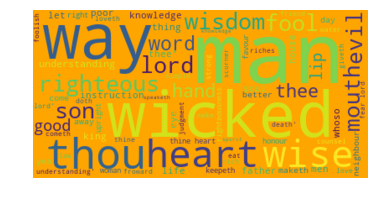

In [544]:
# Generate Word Cloud KJV
new_doc = kjv_prov['KJV_Lower'].tolist()
with open("kjv.txt", "w") as output:
    output.write(str(new_doc))
    
# Start with one review:
word_text = open("kjv.txt").read()

wordcloud = WordCloud(max_font_size=100, max_words=75, background_color="orange").generate(word_text)
plt.figure()
plt.imshow(wordcloud, interpolation="mitchell")
plt.axis("off")

plt.show()

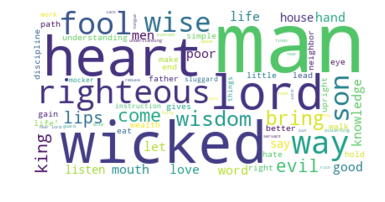

In [547]:
# Generate Word Cloud NIV
new_doc = niv_prov['NIV_Lower'].tolist()
with open("niv.txt", "w") as output:
    output.write(str(new_doc))
    
# Start with one review:
word_text = open("niv.txt").read()

wordcloud = WordCloud(max_font_size=100, max_words=75, background_color="white").generate(word_text)
plt.figure()
plt.imshow(wordcloud, interpolation="mitchell")
plt.axis("off")

plt.show()

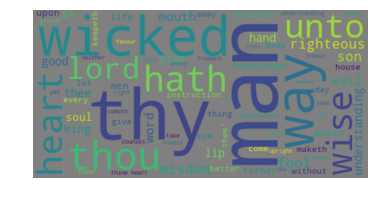

In [362]:
# Generate Word Cloud YLT
new_doc = ylt_prov['YLT_Lower'].tolist()
with open("YLT.txt", "w") as output:
    output.write(str(new_doc))
    
# Start with one review:
word_text = open("ylt.txt").read()

wordcloud = WordCloud(max_font_size=100, max_words=75, background_color="grey").generate(word_text)
plt.figure()
plt.imshow(wordcloud, interpolation="mitchell")
plt.axis("off")

plt.show()

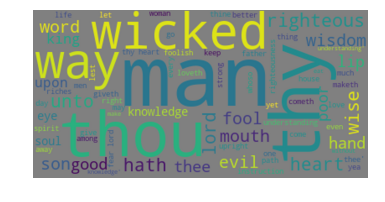

In [363]:
# Generate Word Cloud YLT
new_doc = jsp_prov['JSP_Lower'].tolist()
with open("jsp.txt", "w") as output:
    output.write(str(new_doc))
    
# Start with one review:
word_text = open("jsp.txt").read()

wordcloud = WordCloud(max_font_size=100, max_words=75, background_color="grey").generate(word_text)
plt.figure()
plt.imshow(wordcloud, interpolation="mitchell")
plt.axis("off")

plt.show()

In [ ]:
############## TOPIC MODELING ##############

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [118]:
kjv_prov.head(2)

,Chapter,Verse,KJV,compound,neg,neu,pos,Sentiment,NIV,JSP,ASV,YLT,Geneva,KJV_Avg_Word,Stopwords,KJV_Lower
0,1,1,"The proverbs of Solomon the son of David, king...",0.0000,0.0,1.000,0.000,1,"The proverbs of Solomon son of David, king of ...","THE PROVERBS of Solomon the son of David, king...","The proverbs of Solomon the son of David, king...","The proverbs of Solomon the son of David, king...",The Parables of Salomon the sonne of Dauid Kin...,4.272727,4,proverbs solomon son david king israel
1,1,2,To know wisdom and instruction; to perceive th...,0.5267,0.0,0.746,0.254,2,for attaining wisdom and discipline; for under...,To know wisdom and instruction; to comprehend ...,To know wisdom and instruction; To discern the...,To know wisdom and instruction; to perceive th...,"To knowe wisdome, and instruction, to vndersta...",5.545455,4,know wisdom instruction perceive words underst...


In [294]:
#Group text by chapters

#kjv_chapters = kjv_prov.groupby[("Chapter", "KJV_Lower")]
#kjv_prov['Chapter1'] = num for num in kjv_prov['KJV_Lower'] ["Chapter"] == 1

#kjv_chapters.apply(pd.DataFrame)
kjv_new = kjv_prov[['Chapter', 'KJV_Lower']]


grouped = kjv_new.groupby(['Chapter'], as_index=False)

#groupby(['vid', 'sente'], as_index=False, sort=False)
#List of only text
kjv_verse_num = kjv_prov.Verse.tolist()
kjv_chapter_num = [name for name, group in grouped]
kjv_chapter_text = [group.KJV_Lower for name, group in grouped]

#dataframe
#kjv_chap = [pd.DataFrame(kjv_chapter[i], columns=['Text']) for i in kjv_chapter]
kjv_test = [kjv_chapter[i] for i in range(0,31)]

kjv_chap = pd.DataFrame(kjv_chapter_num, columns=["Chapter"])
kjv_chap['Text'] = kjv_chapter_text

#remove punctionation
kjv_chap['Text'] = kjv_chap['Text']#.str.replace('\b[^\d\W]+\b',' ')

#kjv_chap.to_csv("kjv_chap.tsv", sep='\t', encoding='utf-8')
#kjv_chap.head(1)
kjv_chap["Text"]

test = kjv_chap.iloc[:, 1]
#iloc[ : , 2 ]

#dataFrame.iloc[<ROWS INDEX RANGE> , <COLUMNS INDEX RANGE>]

#newlist = [word for line in mylist for word in line.split()]

number = [num for num in range(1,915)]

kjv_verse_num # the verse numbers



#text_kjv = [kjv_new.iloc[i][z] for i in number for z in kjv_verse_num]
#text_kjv = [kjv_new.iloc[i][z] for i, z in zip(number, kjv_verse_num)]

kjv_new.iloc[100][0]


4

In [328]:
# Test KJV by Chapter
#Listening to Lady Wisdom vs. Madame Folly (Ch. 1-9)
#Short Sayings for a Long Life (Ch. 10-22:16)
#Admonitions & Warnings (Ch. 22:17-24:34)
#Comparisons & Contrasts between Godly and the Ungodly (Ch. 25-29)
#Knowledge of God & His World (Ch. 30) / Advice for Leaders & Ladies (Ch. 31).

kjv_new=pd.read_csv("KJV_Proverbs_Topic.txt", delimiter='\t')
kjv1 = list(kjv_new['Section'][0])
#kjv1 = list(kjv1)
#kjv2 = list(kjv_new['Text'][1])
#kjv3 = list(kjv_new['Text'][3])
#kjv4 = list(kjv_new['Text'][4])
#kjv5 = list(kjv_new['Text'][5])
#kjv6 = list(kjv_new['Text'][6])

In [718]:
###KJV###
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3), token_pattern=r'\b[^\d\W]+\b')
tfidf = tfidf_vectorizer.fit_transform(kjv_prov["KJV_Lower"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,ngram_range=(1,2), token_pattern=r'\b[^\d\W]+\b')
tf = tf_vectorizer.fit_transform(kjv_prov["KJV_Lower"])
tf_feature_names = tf_vectorizer.get_feature_names()

###NIV###

# NMF is able to use tf-idf
niv_tfidf_vectorizer = TfidfVectorizer(max_df=0.98, min_df=2,ngram_range=(1,2), token_pattern=r'\b[^\d\W]+\b')
niv_tfidf = niv_tfidf_vectorizer.fit_transform(niv_prov['NIV_Lower'])
niv_tfidf_feature_names = niv_tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
niv_tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,ngram_range=(1,2), token_pattern=r'\b[^\d\W]+\b')
niv_tf = niv_tf_vectorizer.fit_transform(niv_prov['NIV_Lower'])
niv_tf_feature_names = niv_tf_vectorizer.get_feature_names()

###YLT###

# NMF is able to use tf-idf
ylt_tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,2), token_pattern=r'\b[^\d\W]+\b')
ylt_tfidf = ylt_tfidf_vectorizer.fit_transform(ylt_prov['YLT_Lower'])
ylt_tfidf_feature_names = ylt_tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
ylt_tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,ngram_range=(1,2), token_pattern=r'\b[^\d\W]+\b')
ylt_tf = ylt_tf_vectorizer.fit_transform(ylt_prov['YLT_Lower'])
ylt_tf_feature_names = ylt_tf_vectorizer.get_feature_names()


In [549]:
#output topic distribution
def distribution(fitted_model):
    dis = []
    for i in range(len(fitted_model)):
        doc_no = i
        distribution = fitted_model[i]
        dis.append([doc_no, distribution])
        df_dis = pd.DataFrame(dis, columns = ['Document', 'Distribution'])
    return(df_dis)

In [551]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20

In [720]:
no_topics = 6
###KJV###
# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(niv_tfidf)

# Run LDA
#lda => document key words
#lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
#lda_z => stats for key words
#lda_z = lda.fit_transform(tf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(niv_tfidf)

#tf_feature_names
tf.shape



(915, 1378)

In [721]:
topic = display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
evil pursueth heart abomination work commit thereof ways companion shall rejoice glory milk instruction father lies satisfy drink forget lord mans heart rage shall dwell heareth reproof weight proud heart
Topic 1:
weight oppressor milk hideth hand wise heart wise servant kindness man wise transgressor foreseeth evil lord leave talebearer shutteth wicked desireth entereth enter not favour way life words wise
Topic 2:
better poor lay speech men candle make confidence knowledge food midst fountain life findeth life guide oppressor wise servant maker not thyself meddle not knowledge shall weight
Topic 3:
walk hearken ye milk sea lowly midst loud oppressor make rage way life openeth woman wide weight fool according cometh brawling instruction father man wise oil
Topic 4:
lowly confidence flattereth words foot contentions folding hands uprightness man wise inheritance table thine weight flattering despiseth neighbour life let not wall milk shall destroyed far folding
Topic 5:
hands 

In [ ]:
#topic 0 -> Wisdom makes you Prosperous
#topic 1 -> Emotional Wisdom
#topic 2 -> Warnings(Listen to wisdom)
#topic 3 -> Advice for Leaders
#topic 4 -> Wisdom for Long Life


#Listening to Wisdom (Ch. 1-9)
#Short Sayings for a Long Life (Ch. 10-22:16)
#Admonitions & Warnings (Ch. 22:17-24:34)
#Comparisons & Contrasts between Godly and the Ungodly (Ch. 25-29)
#Advice for Leaders & Ladies (Ch. 30,31).

#Wis-dom in ancient Israel and early Judaism includes at least six critical components: 
#knowledge, imagination, discipline, piety, order, and moral instructions (Perdue, Mays, & Miller, 2000).

In [722]:
# choose posts with major topic probs above the threshold

threshold = 0.3
t = []
for n in range(lda_z.shape[0]):
    most_pr = lda_z[n].max()
    topic_most_pr = lda_z[n].argmax()
    if most_pr > threshold:
        topic = topic_most_pr
    else:
        topic = no_topics
    t.append(topic)
    df_topic = pd.DataFrame(t, columns = ['Topic'])
doc_topic = pd.concat([niv_prov["NIV_Lower"], df_topic], axis = 1)
#doc_topic.to_csv('Document_Topic.csv', index = False, header =True, encoding = 'utf-8')
doc_topic


,NIV_Lower,Topic
0,proverbs solomon son david king israel,1
1,attaining wisdom discipline understanding word...,2
2,acquiring disciplined prudent life doing right...,0
3,giving prudence simple knowledge discretion young,2
4,let wise listen add learning let discerning gu...,2
5,understanding proverbs parables sayings riddle...,0
6,fear lord beginning knowledge fools despise wi...,2
7,listen son fathers instruction not forsake mot...,3
8,will garland grace head chain adorn neck,4
9,son sinners entice not,3


In [555]:
kjv_prov['KJV_Lower'][500]

'fool holdeth peace counted wise shutteth lips esteemed man understanding'

In [556]:
niv_prov['NIV_Lower'][500]

'fool thought wise keeps silent discerning holds tongue'

In [725]:
#Perplexity
no_topic = []
perplexity_ = []
topics_min = 1
topics_max =7
for i in range(topics_min,topics_max,1):
    lda = LatentDirichletAllocation(n_components=i, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)       
    lda_z = lda.fit_transform(niv_tfidf)
    no_topic.append(i)
    perplexity_.append(lda.perplexity(niv_tfidf))

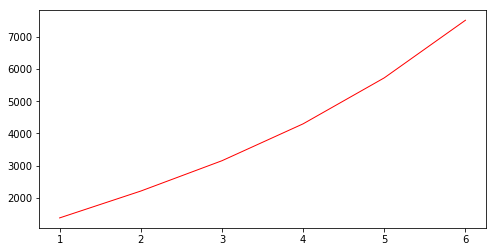

In [726]:
# plot the perplexity measure with number of topics
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(no_topic,perplexity_,color="red",linewidth=1)

In [397]:
no_topics = 6
###NIV###
# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(niv_tfidf)

# Run LDA
#lda => document key words
#lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
#lda_z => stats for key words
#lda_z = lda.fit_transform(tf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(niv_tf)
#tf_feature_names

print(niv_tf.shape)



(915, 1399)


In [377]:
#Perplexity
no_topic = []
perplexity_ = []
topics_min = 1
topics_max = 20
for i in range(topics_min,topics_max,1):
    lda = LatentDirichletAllocation(n_components=i, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)       
    lda_z = lda.fit_transform(niv_tf)
    no_topic.append(i)
    perplexity_.append(lda.perplexity(niv_tf))

In [398]:
topic = display_topics(lda, niv_tf_feature_names, no_top_words)

Topic 0:
city makes give linen go city gate gate bed lamp words profitable seat night takes husband land fine among clothed sees
Topic 1:
man poor righteous wicked hands one blessed food mouth lips gives little needy evil neighbor away comes children yet wise
Topic 2:
heart wisdom knowledge mans wise life may house fool go mouth love instruction let lord son better tongue folly wicked
Topic 3:
whoever pay rebuke listen wise things good lips say hands earth fool honey gain son pledge security neighbor four puts security
Topic 4:
lord evil way fear son men heart wisdom eyes understanding wicked many father good wise discipline bring fear lord life joy
Topic 5:
like wicked righteous whose food come hand eat brings strength family servant noble strong wine day bread wife holds dark


In [399]:
no_topics = 6
###TLY###
# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(ylt_tfidf)

# Run LDA
#lda => document key words
#lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
#lda_z => stats for key words
#lda_z = lda.fit_transform(tf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(ylt_tf)
#tf_feature_names
ylt_tf.shape


(915, 1501)

In [400]:
topic = display_topics(lda, ylt_tf_feature_names, no_top_words)

Topic 0:
man hath lord poor thou wicked understanding mouth shall wisdom fool among ways giveth abomination many righteous fools bread lips
Topic 1:
maketh household snow coverings tapestry tapestry coverings fine linen linen fine afraid delivereth clothing selleth unto talebearer belly parts parts belly summer harvest
Topic 2:
goeth drink gold merchandise good better riches night silver hand candle let wine us give evil things neither let us dwell
Topic 3:
children ye blessed husband arise call also taketh earth woman strife therefore one ye children old set hearken mighty water hearken unto
Topic 4:
shall thy heart man thou way thee wicked wise unto thine hands lord son evil soul righteous life good let
Topic 5:
away words wisdom forth thou mouth sleep unto get little better counsel put thy understand multitude bringeth righteousness cause fool


# Using SKLearn for topic Modeling

In [585]:
my_stopwords = frozenset(['though', 'you','thy','hath', 'get', 'seemed', 'sincere', 'nowhere', 'detail', 'cry', 'alone', 'also', 'whence', 'anything', 'your', 'since', 'being', 'sometime', 'beforehand', 'became', 'of', 'amoungst', 'what', 'both', 'under', 'should', 'that', 'when', 'interest', 'two', 'i', 'bill', 'by', 'thus', 'beyond', 'herself', 'give', 'below', 'out', 'sometimes', 'off', 'either', 'thence', 'might', 'she', 'through', 'wherein', 'at', 'whom', 'something', 'without', 'someone', 'whole', 'couldnt', 'anywhere', 'former', 'formerly', 'eight', 'already', 'such', 'together', 'across', 'further', 'describe', 'seeming', 'with', 'amongst', 'find', 'serious', 'de', 'inc', 'however', 'could', 'have', 'much', 'hundred', 'anyway', 'must', 'another', 'us', 'others', 'some', 'latter', 'seems', 'hence', 'amount', 'name', 'yourself', 'although', 'onto', "unto", 'back', 'how', 'perhaps', 'the', 'therefore', 'more', 'he', 'hasnt', 'latterly', 'me', 'hereafter', 'none', 'or', 'this', 'until', 'within', 'move', 'as', 'can', 'to', 'been', 'his', 'had', 'itself', 'few', 'fire', 'behind', 'several', 'almost', 'beside', 'one', 'see', 're', 'seem', 'whatever', 'via', 'con', 'who', 'become', 'indeed', 'else', 'never', 'over', 'along', 'thin', 'empty', 'be', 'because', 'themselves', 'top', 'co', 'an', 'them', 'mostly', 'while', 'somewhere', 'neither', 'where', 'ever', 'always', 'into', 'about', 'cannot', 'take', 'five', 'sixty', 'ten', 'too', 'upon', 'whereas', 'whereupon', 'ie', 'afterwards', 'except', 'found', 'un', 'elsewhere', 'due', 'whenever', 'other', 'thereby', 'third', 'mine', 'thou','whither', 'call', 'six', 'thereupon', 'ourselves', 'made', 'next', 'side', 'they', 'same', 'against', 'so', 'around', 'mill', 'here', 'show', 'less', 'thru', 'up', 'has', 'everywhere', 'keep', 'her', 'among', 'every', 'still', 'than', 'fill', 'fifty', 'own', 'am', 'system', 'him', 'everything', 'first', 'which', 'would', 'during', 'everyone', 'hereupon', 'hers', 'our', 'nothing', 'ours', 'from', 'many', 'go', 'between', 'forty', 'front', 'moreover', 'four', 'is', 'myself', 'noone', 'thereafter', 'if', 'part', 'there', 'these', 'thick', 'twenty', 'may', 'were', 'yet', 'before', 'bottom', 'ltd', 'rather', 'cant', 'nobody', 'well', 'whereby', 'yours', 'its', 'no', 'and', 'now', 'it', 'please', 'whoever', 'becomes', 'full', 'himself', 'are', 'nine', 'fifteen', 'meanwhile', 'besides', 'we', 'was', 'very', 'last', 'put', 'otherwise', 'per', 'those', 'my', 'whether', 'somehow', 'done', 'three', 'etc', 'least', 'eg', 'for', 'in', 'then', 'throughout', 'each', 'all', 'any', 'wherever', 'only', 'yourselves', 'their', 'above', 'after', 'again', 'but', 'on', 'most', 'becoming', 'therein', 'once', 'towards', 'enough', 'whose', 'do', 'a', 'eleven', 'why', 'often', 'down', 'hereby', 'twelve', 'toward', 'whereafter', 'even', 'namely', 'herein', 'anyone', 'nevertheless', 'anyhow', 'don', 'did', 'sensor', 'data', 'sensors', 'egg', 'would', 'air','ve', 'im', 'get', 'ã¼','â', 'x', 'v', 'z', 'p', 't','u', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 's', 'm','n','o'])


In [749]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 4
 
vectorizer = TfidfVectorizer(max_df=0.98, min_df=1,ngram_range=(1,2),
                             stop_words=my_stopwords, lowercase=True, token_pattern=r'\b[^\d\W]+\b')
data_vectorized = vectorizer.fit_transform(kjv_prov["KJV_Lower"])
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(data_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
 
# Let's see how the first document in the corpus looks like in different topic spaces
print(lda_Z[0])
print(nmf_Z[0])
print(lsi_Z[0])

(915, 4)
(915, 4)
(915, 4)
[0.0601678  0.81961452 0.05899229 0.0612254 ]
[0.         0.0360682  0.         0.00171732]
[ 0.02529396  0.03331709  0.02345942 -0.00061165]


In [750]:
#In order to inspect the inferred topics we need to implement a print function ourselves:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, vectorizer)
print("=" * 20)
 
#print("NMF Model:")
#print_topics(nmf_model, vectorizer)
#print("=" * 10)
 
#print("LSI Model:")
#print_topics(lsi_model, vectorizer)
#print("=" * 10)

LDA Model:
Topic 0:
[('hands', 7.054897640523798), ('poor', 5.356100669281146), ('shall', 5.072214661923953), ('fruit', 4.915185677915806), ('not', 4.681816602988245), ('fruit hands', 4.447325203514506), ('man', 4.290981064775615), ('night', 4.239538031958493), ('hand', 4.136628559115078), ('law', 3.7531967966051276)]
Topic 1:
[('man', 3.8773229529644375), ('excellest', 3.3950607240030455), ('daughters virtuously', 3.395002171178059), ('virtuously', 3.394827504923866), ('virtuously excellest', 3.3948135021411168), ('daughters', 3.293262332777199), ('known', 3.2035235478660873), ('like', 3.0883105573025267), ('wisdom', 3.011268280397041), ('strength', 2.9106420275305482)]
Topic 2:
[('not', 7.020233659812136), ('household', 5.557881283550921), ('thine', 4.811792334025492), ('shall', 4.77881270609541), ('wicked', 4.168527917124417), ('hands', 3.8303377672174017), ('woman', 3.78302042534062), ('children', 3.6188310022539363), ('words', 3.291005884723865), ('blessed', 3.2820402229137553)]
T

In [733]:
#Transforming an unseen document goes like this:
text = niv_prov['NIV_Lower'][300]
x = lda_model.transform(vectorizer.transform([text]))[0]
print(x)



[0.05528927 0.05673207 0.83242986 0.0555488 ]


In [576]:
#Here’s how to implement the similarity functionality we’ve seen in the gensim section:

from sklearn.metrics.pairwise import euclidean_distances
 
def most_similar(x, Z, top_n=10):
    dists = euclidean_distances(x.reshape(1, -1), Z)
    pairs = enumerate(dists[0])
    most_similar = sorted(pairs, key=lambda item: item[1])[:top_n]
    return most_similar
 
similarities = most_similar(x, lda_Z)
document_id, similarity = similarities[0]
print(kjv_prov['KJV_Lower'][document_id][:1000])

crieth chief place concourse openings gates city uttereth words saying


In [517]:
#In case you are running this in a Jupyter Notebook, run the following lines to init bokeh:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [657]:
#Let’s plot documents in 2D:
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(data_vectorized)
 
df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = documents_2d[:,0], documents_2d[:,1], range(len(kjv_prov['KJV_Lower']))
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=10,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [658]:
#You can try going through the documents to see if indeed closer documents on the plot are more similar. 
#To display words in 2D we just need to transpose the vectorized data: words_2d = svd.fit_transform(data_vectorized.T).

svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(data_vectorized.T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [752]:
#LDA is the most popular method for doing topic modeling in real-world applications. 
#That is because it provides accurate results, can be trained online (do not retrain every time we get new data) 
#and can be run on multiple cores. 
#Let’s repeat the process we did in the previous sections with sklearn and LatentDirichletAllocation:


from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 4
 
vectorizer = TfidfVectorizer(max_df=0.98, min_df=1,ngram_range=(1,2),
                             stop_words=my_stopwords, lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(niv_prov["NIV_Lower"])
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
 
    
#Transforming an unseen document goes like this:
text = niv_prov['NIV_Lower'][10]
x = lda_model.transform(vectorizer.transform([text]))[0]
print(x, x.sum())

<>:13: DeprecationWarning: invalid escape sequence \-
<>:13: DeprecationWarning: invalid escape sequence \-
<>:13: DeprecationWarning: invalid escape sequence \-
<ipython-input-752-da091eea65c9>:13: DeprecationWarning: invalid escape sequence \-
  stop_words=my_stopwords, lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


[0.04757215 0.05119754 0.04770662 0.85352369] 1.0


In [ ]:
NIV 
Topic 0

Topic 1

Topic 2

Topic 3 

In [ ]:
#Notice how the factors corresponding to each component (topic) add up to 1. 
#That’s not a coincidence. Indeed, LDA considers documents as being generated by a mixture of the topics. 
#The purpose of LDA is to compute how much of the document was generated by which topic. 
#In this example, more than half of the document has been generated by the second topic:

In [ ]:
#LDA is an iterative algorithm. Here are the two main steps:

# In the initialization stage, each word is assigned to a random topic.
# Iteratively, the algorithm goes through each word and reassigns the word to a topic taking into consideration:
# What’s the probability of the word belonging to a topic
# What’s the probability of the document to be generated by a topic

In [716]:
#Due to these important qualities, we can visualize LDA results easily. 
#We’re going to use a specialized tool called PyLDAVis:

import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel



C:\Users\Maximilliano\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1     -375.441895 -182.389282       1        1  33.495028
3      257.651764  133.081406       2        1  26.187774
2      572.793457 -500.178040       3        1  25.885329
0      -60.303600 -815.645203       4        1  14.431868, topic_info=     Category      Freq                    Term     Total  loglift  logprob
2463  Default  2.000000               household  2.000000  30.0000  30.0000
577   Default  1.000000                children  1.000000  29.0000  29.0000
1851  Default  2.000000                   fruit  2.000000  28.0000  28.0000
331   Default  1.000000                 blessed  1.000000  27.0000  27.0000
5585  Default  3.000000                    thee  3.000000  26.0000  26.0000
6380  Default  3.000000                    wise  3.000000  25.0000  25.0000
2127  Default  4.000000                   hands  4.000000  24.0000  24.0000
135   Default  0.000000                   arise  0.000000  23.0000  23.0000
1853  Default  1.000000             fruit hands  1.000000  22.0000  22.0000
2970  Default  1.000000                    like  1.000000  21.0000  21.0000
1975  Default  1.000000                   goeth  1.000000  20.0000  20.0000
4092  Default  0.000000                praiseth  0.000000  19.0000  19.0000
578   Default  0.000000          children arise  0.000000  18.0000  18.0000
136   Default  0.000000           arise blessed  0.000000  17.0000  17.0000
2493  Default  0.000000        husband praiseth  0.000000  16.0000  16.0000
333   Default  0.000000         blessed husband  0.000000  15.0000  15.0000
10    Default  1.000000             abomination  1.000000  14.0000  14.0000
1916  Default  0.000000           girdeth loins  0.000000  13.0000  13.0000
140   Default  0.000000                    arms  0.000000  12.0000  12.0000
5405  Default  0.000000           strengtheneth  0.000000  11.0000  11.0000
3049  Default  0.000000                   loins  0.000000  10.0000  10.0000
3050  Default  0.000000          loins strength  0.000000   9.0000   9.0000
1915  Default  0.000000                 girdeth  0.000000   8.0000   8.0000
5400  Default  0.000000  strength strengtheneth  0.000000   7.0000   7.0000
5406  Default  0.000000      strengtheneth arms  0.000000   6.0000   6.0000
3631  Default  1.000000                   night  1.000000   5.0000   5.0000
6524  Default  0.000000       worketh willingly  0.000000   4.0000   4.0000
6478  Default  0.000000                    wool  0.000000   3.0000   3.0000
1649  Default  0.000000                    flax  0.000000   2.0000   2.0000
4755  Default  0.000000            seeketh wool  0.000000   1.0000   1.0000
...       ...       ...                     ...       ...      ...      ...
136    Topic4  0.619839           arise blessed  0.889698   1.5743  -6.6353
333    Topic4  0.619788         blessed husband  0.889625   1.5743  -6.6354
140    Topic4  0.595480                    arms  0.865155   1.5622  -6.6754
5405   Topic4  0.595422           strengtheneth  0.865076   1.5622  -6.6755
1915   Topic4  0.595391                 girdeth  0.865102   1.5621  -6.6756
5406   Topic4  0.595374      strengtheneth arms  0.865124   1.5620  -6.6756
3049   Topic4  0.595440                   loins  0.865245   1.5620  -6.6755
1916   Topic4  0.595530           girdeth loins  0.865386   1.5620  -6.6753
3050   Topic4  0.595455          loins strength  0.865306   1.5620  -6.6754
5400   Topic4  0.595427  strength strengtheneth  0.865297   1.5619  -6.6755
1649   Topic4  0.557517                    flax  0.827104   1.5413  -6.7413
6524   Topic4  0.557593       worketh willingly  0.827222   1.5413  -6.7411
6478   Topic4  0.557559                    wool  0.827256   1.5412  -6.7412
4755   Topic4  0.557508            seeketh wool  0.827199   1.5412  -6.7413
6479   Topic4  0.557472               wool flax  0.827268   1.5410  -6.7414
6299   Topic4  0.557461              

In [736]:
#Next, we will use LDA to create topics along with the probability distribution for each word in our 
#vocabulary for each topic. Execute the following script:
#count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words=my_stopwords, token_pattern=r'\b[^\d\W]+\b')  
doc_term_matrix = vectorizer.fit_transform(niv_prov["NIV_Lower"].values.astype('U'))  
#LDA = LatentDirichletAllocation(n_components=10, random_state=42)  
lda_model.fit(doc_term_matrix)  

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [737]:
# attach topics to verse

topic_values = lda_model.transform(doc_term_matrix)  
topic_values.shape  

(915, 4)

In [756]:
#The following script adds a new column for topic in the data frame and assigns the topic value to each row in the column:

niv_prov['Topic'] = topic_values.argmax(axis=1)  
#Let's now see how the data set looks:

niv_prov[49:100] 

,Chapter,Verse,NIV,NIV_Avg_Word,Stopwords,NIV_Lower,Avg_Word,Topic
49,2,17,who has left the partner of her youth and igno...,4.250000,9,left partner youth ignored covenant god,4.250000,1
50,2,18,For her house leads down to death and her path...,3.750000,9,house leads death paths spirits dead,3.750000,0
51,2,19,None who go to her return or attain the paths ...,3.583333,6,return attain paths life,3.583333,1
52,2,20,Thus you will walk in the ways of good men and...,3.611111,10,will walk ways good men paths righteous,3.611111,1
53,2,21,"For the upright will live in the land, and the...",4.066667,8,upright will live land blameless will remain,4.066667,0
54,2,22,"but the wicked will be cut off from the land, ...",3.833333,12,wicked will cut land unfaithful will torn,3.833333,1
55,3,1,"My son, do not forget my teaching, but keep my...",4.071429,7,son not forget teaching commands heart,4.071429,0
56,3,2,for they will prolong your life many years and...,4.750000,6,will prolong life years bring prosperity,4.750000,2
57,3,3,Let love and faithfulness never leave you; bin...,4.550000,8,let love faithfulness leave bind neck write ta...,4.550000,3
58,3,4,Then you will win favor and a good name in the...,3.312500,8,will win favor good sight god man,3.312500,1


In [743]:
##### Group by topics
#kjv_prov[['Verse', 'KJV_Lower', 'Topic']].groupby(['Verse', 'Topic']).agg(['mean', 'count'])

#df_kjv = kjv_prov.groupby(['Chapter', 'Verse','Topic']).size().reset_index(name='counts')
df_niv = niv_prov.groupby(['Chapter',"Verse",'Topic']).size().reset_index(name='counts')

df_niv.head()

,Chapter,Verse,Topic,counts
0,1,1,3,1
1,1,10,0,1
2,1,11,0,1
3,1,12,2,1
4,1,13,3,1


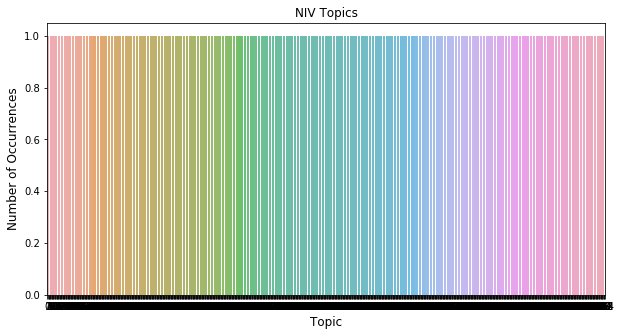

In [744]:
topic  = df_niv['Topic'].value_counts()
topic_count = df_niv['counts']
plt.figure(figsize=(10,5))
sns.barplot(topic_count.index, topic_count.values, alpha=0.8)
plt.title('NIV Topics')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.show()

In [745]:
topics

3    310
0    226
2    219
1    160
Name: Topic, dtype: int64

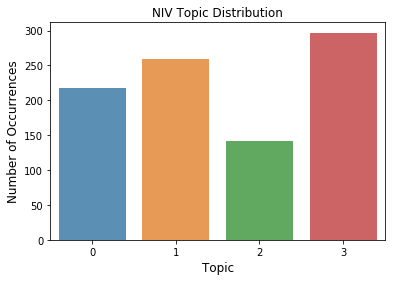

In [746]:
topics = df_niv['Topic'].value_counts()[:4]
#df[df.Timezone == 'GMT-05:00 America/New_York']['City'].value_counts()[:10]
plt.figure()
sns.barplot(topics.index, topics.values, alpha=0.8)
plt.title('NIV Topic Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.show()

In [458]:
#tone analyzer
import requests

In [462]:
#api_key = 'zQ6ej_uQ5jLj4OpCx8lq_btWC6Ht8p92sjidXwh9jveY'

url = 'https://gateway.watsonplatform.net/tone-analyzer/api//v3/tone'

text = kjv_prov['KJV_Lower'][1]



In [625]:
params = (
    ('version', '2017-09-21'),
    ('text', text),)

response = requests.get(
    url,
    params=params,
    auth=('apikey','zKd39EdDCncdai79nAfGe0utZrZF3cZzQK33VrPHKOMn'))

In [626]:
response_json = response.json()
response_json

{'document_tone': {'tones': []}}

In [627]:
def analyze_tone(tweet):
    """
    this function takes a tweet and returns the JSON result from IBM's Tone Analyzer Application
    """
    
    params = (
        ('version', '2017-09-21'),
        ('text', tweet),)

    response = requests.get(
        url,
        params=params,
        auth=('apikey', 'zQ6ej_uQ5jLj4OpCx8lq_btWC6Ht8p92sjidXwh9jveY'))
    
        #auth=('apikey', 'zQ6ej_uQ5jLj4OpCx8lq_btWC6Ht8p92sjidXwh9jveY'))
    
    return response

In [628]:
kjv_prov_sentiment = []

for text in kjv_prov['KJV_Lower']:
    sentiment = analyze_tone(text)
    if sentiment.status_code != 200:
        break
    kjv_prov_sentiment.append(sentiment)

In [630]:
len(kjv_prov_sentiment)

915

In [632]:
kjv_prov_sentiment[800].json()

{'document_tone': {'tones': [{'score': 0.96251,
    'tone_id': 'analytical',
    'tone_name': 'Analytical'}]}}

In [629]:

niv_prov_sentiment = []

for text in niv_prov['NIV_Lower']:
    sentiment = analyze_tone(text)
    if sentiment.status_code != 200:
        break
    niv_prov_sentiment.append(sentiment)

In [631]:
len(niv_prov_sentiment)

915

In [633]:
niv_prov_sentiment[800].json()

{'document_tone': {'tones': [{'score': 0.920855,
    'tone_id': 'analytical',
    'tone_name': 'Analytical'}]}}

#### Analzying Document Tone
Collection Procedure:

Initialize an empty dataframe
Loop through all of the indices of tweer_sentiment
we want the index so that we can refer back to the original tweet
as opposed to looping through the list element-wise
Fetch all of the tones and their associates scores
Sort the tone list for each tweet and choose the dominant tone
Convert the list into 1 row by 4 column dataframe (including the tweet text)
Set the tweet text as the index
NOTE: Not all tweets yielded analyzed tone, so we need to try/except
Except will add Null data (np.NaN)
Append the tweet level dataframe to the initialized dataframe outside the loop

In [634]:
kjv_text = kjv_prov['KJV_Lower'].tolist()

kjv_tone_df = pd.DataFrame()

for i in range(len(kjv_prov_sentiment)):
    # fetch the json, then the document tones
    sent_json = kjv_prov_sentiment[i].json()
    doc_tones = sent_json['document_tone']['tones']

    # convert the dictionary to a list of just the dict values
    doc_tones_list = [list(tone.values()) for tone in doc_tones]
    # sort the list by the score (highest to lowest)
    doc_tones_list.sort(reverse=True)
    # if the tweet was analyzed, then append the tweet text to the front of the most dominant tone by score
    # else add the text followed by three null values
    try:
        predominant_tones = [str(i), kjv_text[i]] +doc_tones_list[0]
        df = pd.DataFrame([predominant_tones], columns=['Verse','KJV_Lower','score','tone_id','tone_name'])
    except:
         df = pd.DataFrame([[str(i), kjv_text[i]]+[np.NaN, np.NaN, np.NaN]], columns=['Verse','KJV_Lower','score','tone_id','tone_name'])

    # append the 1 row dataframe to the tone_df dataframe initialized above
    kjv_tone_df = kjv_tone_df.append(df)

kjv_tone_df = kjv_tone_df.reset_index(drop=True)

In [758]:
kjv_tone_df

,Verse,KJV_Lower,score,tone_id,tone_name
0,0,proverbs solomon son david king israel,0.842108,analytical,Analytical
1,1,know wisdom instruction perceive words underst...,0.955445,analytical,Analytical
2,2,receive instruction wisdom justice judgment eq...,0.842108,analytical,Analytical
3,3,subtilty simple young man knowledge discretion,0.941308,analytical,Analytical
4,4,wise man will hear will increase learning man ...,0.821913,analytical,Analytical
5,5,understand proverb interpretation words wise d...,0.977350,analytical,Analytical
6,6,fear lord beginning knowledge fools despise wi...,0.876257,fear,Fear
7,7,son hear instruction father forsake not law mo...,NaN,NaN,NaN
8,8,shall ornament grace head chains neck,NaN,NaN,NaN
9,9,son sinners entice thee consent not,0.532616,analytical,Analytical


In [636]:
#group the KJV tones to identify a footprint
kjv_tone_df.groupby(['tone_name'], as_index=False)['tone_id'].count().sort_values(by='tone_id', ascending=False)

,tone_name,tone_id
0,Analytical,266
4,Joy,176
5,Sadness,53
1,Anger,50
2,Confident,49
6,Tentative,36
3,Fear,24


In [504]:
# Analyze which tone 
for text in kjv_tone_df[kjv_tone_df['tone_name'] == 'Fear']['KJV_Lower']:
    print(text)

fear lord beginning knowledge fools despise wisdom instruction
lay wait blood lurk privily lives
also laugh calamity mock fear cometh
fear cometh desolation destruction cometh whirlwind distress anguish cometh upon
whoso hearkeneth unto shall dwell safely shall quiet fear evil
wise thine eyes fear lord depart evil
thou liest thou shalt afraid yea thou shalt lie thy sleep shall sweet
afraid sudden fear neither desolation wicked cometh
passing street near corner went way house
fear lord hate evil pride arrogancy evil way froward mouth hate
fear lord beginning wisdom knowledge holy understanding
fear wicked shall come upon desire righteous shall granted
fear lord prolongeth days years wicked shall shortened
fear lord fountain life depart snares death
better little fear lord great treasure trouble therewith
fear lord instruction wisdom honour humility
mercy truth iniquity purged fear lord men depart evil
fear lord tendeth life hath shall abide satisfied shall visited evil
fear king roaring

In [759]:
niv_text = niv_prov['NIV_Lower'].tolist()

niv_tone_df = pd.DataFrame()

for i in range(len(niv_prov_sentiment)):
    # fetch the json, then the document tones
    sent_json = niv_prov_sentiment[i].json()
    doc_tones = sent_json['document_tone']['tones']

    # convert the dictionary to a list of just the dict values
    doc_tones_list = [list(tone.values()) for tone in doc_tones]
    # sort the list by the score (highest to lowest)
    doc_tones_list.sort(reverse=True)
    # if the tweet was analyzed, then append the tweet text to the front of the most dominant tone by score
    # else add the text followed by three null values
    try:
        predominant_tones = [str(i), niv_text[i]] +doc_tones_list[0]
        df = pd.DataFrame([predominant_tones], columns=['Verse','NIV_Lower','score','tone_id','tone_name'])
    except:
         df = pd.DataFrame([[str(i), niv_text[i]]+[np.NaN, np.NaN, np.NaN]], columns=['Verse','NIV_Lower','score','tone_id','tone_name'])

    # append the 1 row dataframe to the tone_df dataframe initialized above
    niv_tone_df = niv_tone_df.append(df)

niv_tone_df = niv_tone_df.reset_index(drop=True)

In [766]:
niv_tone_df["Verse"] = niv_prov[['Verse']]
niv_tone_df["Chapter"] = niv_prov[['Chapter']]
niv_tone_df.head(50)

,Verse,NIV_Lower,score,tone_id,tone_name,Chapter
0,1,proverbs solomon son david king israel,0.842108,analytical,Analytical,1
1,2,attaining wisdom discipline understanding word...,0.991736,analytical,Analytical,1
2,3,acquiring disciplined prudent life doing right...,0.889390,tentative,Tentative,1
3,4,giving prudence simple knowledge discretion young,0.950378,analytical,Analytical,1
4,5,let wise listen add learning let discerning gu...,0.972214,analytical,Analytical,1
5,6,understanding proverbs parables sayings riddle...,0.955445,analytical,Analytical,1
6,7,fear lord beginning knowledge fools despise wi...,0.920855,analytical,Analytical,1
7,8,listen son fathers instruction not forsake mot...,0.626454,joy,Joy,1
8,9,will garland grace head chain adorn neck,NaN,NaN,NaN,1
9,10,son sinners entice not,NaN,NaN,NaN,1


In [767]:
#group the KJV tones to identify a footprint
niv_tone_df.groupby(["Chapter", 'tone_name'], as_index=False)['tone_id'].count().sort_values(by='tone_id', ascending=False)

,Chapter,tone_name,tone_id
10,3,Analytical,14
35,8,Joy,14
73,15,Analytical,14
32,8,Analytical,13
43,10,Analytical,13
66,14,Analytical,12
13,3,Joy,12
0,1,Analytical,12
122,23,Joy,12
125,24,Analytical,12


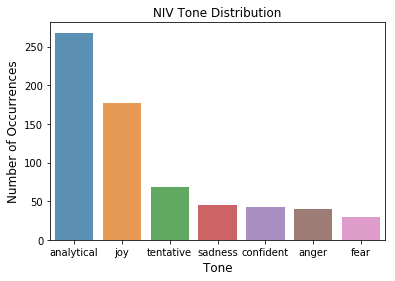

In [771]:
tone = niv_tone_df['tone_id'].value_counts()[:7]
#df[df.Timezone == 'GMT-05:00 America/New_York']['City'].value_counts()[:10]
plt.figure()
sns.barplot(tone.index, tone.values, alpha=0.8)
plt.title('NIV Tone Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tone', fontsize=12)
plt.show()

In [775]:
tone  = niv_tone_df['tone_id'].value_counts()
tone_count = niv_tone_df['Chapter']
plt.figure(figsize=(10,5))
sns.barplot(tone.tone_id, tone_count.values, alpha=0.8)
plt.title('NIV Topics')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.show()

AttributeError: 'Series' object has no attribute 'tone_id'

<Figure size 720x360 with 0 Axes>

In [653]:
#Comute Similarity
from sklearn.metrics.pairwise import cosine_similarity   
# data from https://www.bowdoin.edu/studentaffairs/academic-honesty/examples/mosaic/index.shtml

#kjv_txt_original = open("kjv.txt").read()
#niv_txt_plagiarized = open("niv.txt").read()

kjv_txt_original = kjv_prov["KJV_Lower"][1]
niv_txt_plagiarized = niv_prov["NIV_Lower"][1]


#test needs to be is a list for comparison
#can use plagarism similarity also for comparison between two or more texts. 
txts = [kjv_txt_original, niv_txt_plagiarized]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#unigram_count = CountVectorizer(encoding='latin-1', binary=False)
bigram = TfidfVectorizer(max_df=0.98, min_df=1,ngram_range=(1,2),
                             stop_words=my_stopwords, lowercase=True)

vecs = bigram.fit_transform(txts)

print(vecs.shape)

from sklearn.metrics.pairwise import linear_kernel
cos_sim = cosine_similarity(vecs[0], vecs)
print(cos_sim)

######What does this do???  ###############
sim_sorted_doc_idx = cos_sim.argsort()
print(sim_sorted_doc_idx.shape)

# print the most similar doc; it's actually the original doc itself
print(txts[sim_sorted_doc_idx[0][len(txts)-1]])
print()

# print the second most similar doc; it's the most likely plagiarized one
print(txts[sim_sorted_doc_idx[0][len(txts)-2]])

(2, 16)
[[1. 0.]]
(1, 2)
know wisdom instruction perceive words understanding

attaining wisdom discipline understanding words insight
